In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
sns.set_theme(style="whitegrid")
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df=pd.read_csv('dataset_Facebook.csv',sep=';')
df1=df.copy()

In [3]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [5]:
df.describe()


,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [6]:
df.shape


(500, 19)

In [7]:
len(df)


500

In [8]:
df.columns


Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [9]:
len(df.columns)


19

In [10]:
len(df.describe().columns)


18

In [11]:
df.describe().columns

Index(['Page total likes', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

In [12]:
print(df.isnull().sum())

ctgrs = ["Paid", "like", "share"]

for x in ctgrs:
    df1[x].fillna(df1[x].median(), inplace=True)


Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [13]:
df1.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   0
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [14]:
data_one_hot = pd.get_dummies(df1['Type'], drop_first=True).astype(int)

df1 = pd.concat([df1, data_one_hot], axis=1)
df1.drop('Type', axis=1, inplace=True)
df1 = df1.drop(['Status', 'Video'], axis=1)

In [15]:
for col in df.columns:
    print(col, df[col].nunique())

for col in df.columns:
    values = []
    
    if col not in df.describe().columns:
        for val in df[col].unique():
            values.append(val)
        
        print("{0} -> {1}".format(col, values))

Page total likes 90
Type 4
Category 3
Post Month 12
Post Weekday 7
Post Hour 22
Paid 2
Lifetime Post Total Reach 485
Lifetime Post Total Impressions 494
Lifetime Engaged Users 414
Lifetime Post Consumers 422
Lifetime Post Consumptions 440
Lifetime Post Impressions by people who have liked your Page 491
Lifetime Post reach by people who like your Page 469
Lifetime People who have liked your Page and engaged with your post 382
comment 46
like 257
share 88
Total Interactions 280
Type -> ['Photo', 'Status', 'Link', 'Video']


<Axes: >

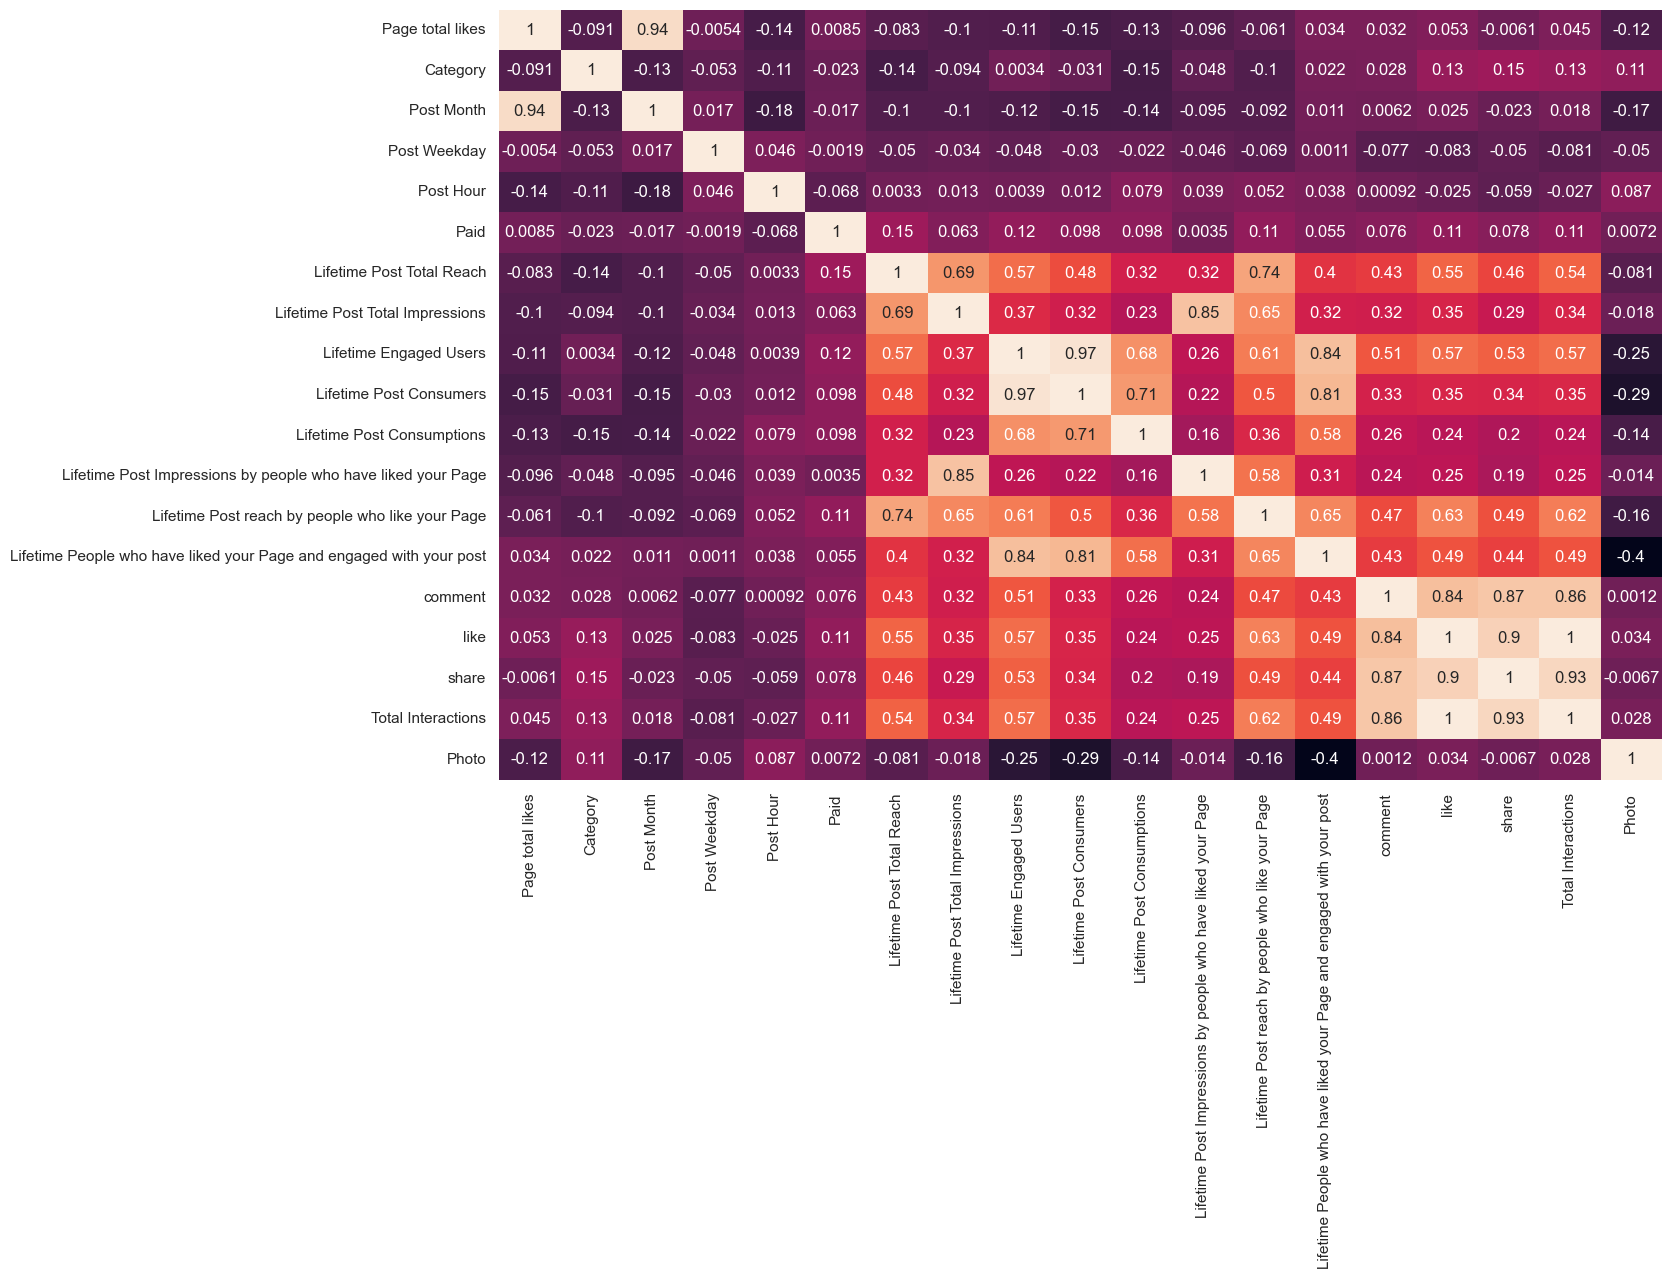

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,cbar=False)

In [17]:
interactions_by_month= df.groupby(['Post Month'])['Total Interactions'].sum().reset_index()
interactions_by_month

,Post Month,Total Interactions
0,1,4015
1,2,6293
2,3,3494
3,4,10876
4,5,9483
5,6,7728
6,7,17082
7,8,7663
8,9,10026
9,10,10974


Text(0.5, 1.0, 'Gune Gore Toplam Etkilesim')

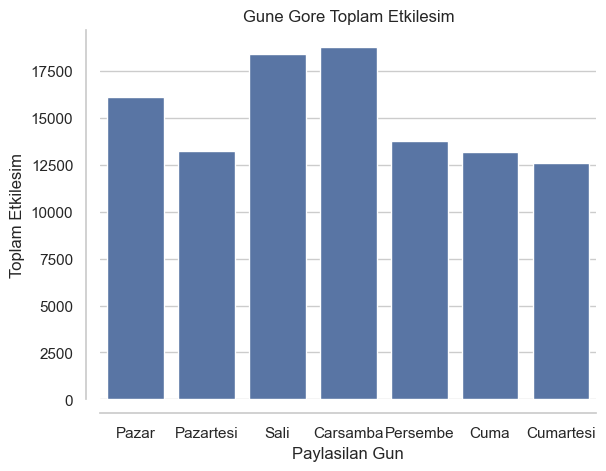

In [18]:
gunluk_etk= df1.groupby(['Post Weekday'])['Total Interactions'].sum().reset_index()
sns.barplot(x='Post Weekday', y='Total Interactions', data=gunluk_etk)
plt.xlabel('Paylasilan Gun')
plt.ylabel('Toplam Etkilesim')
handles = ["Pazar", "Pazartesi", "Sali", "Carsamba", "Persembe", "Cuma",'Cumartesi']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
sns.despine(offset = 10)
plt.title("Gune Gore Toplam Etkilesim")

Text(0.5, 1.0, 'Saate Gore Toplam Etkilesim')

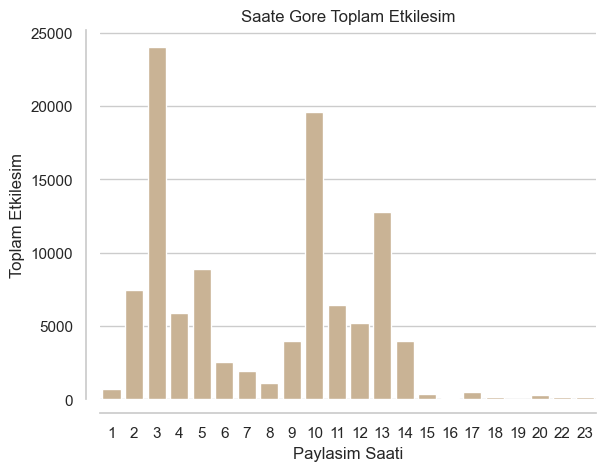

In [19]:
saat_etk= df1.groupby(['Post Hour'])['Total Interactions'].sum().reset_index()
bar_color = 'tan'
plt.xlabel('Paylasim Saati')
plt.ylabel('Toplam Etkilesim')
sns.barplot(x='Post Hour', y='Total Interactions', data=saat_etk,color=bar_color)
sns.despine(offset = 10)
plt.title("Saate Gore Toplam Etkilesim")

Text(0.5, 1.0, 'Odeme Yapilmasina Gore Toplam Etkilesim')

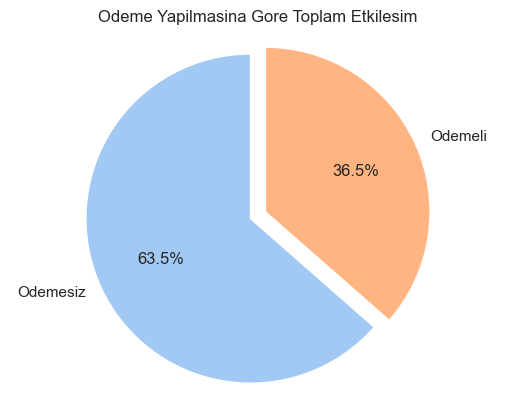

In [20]:
paid_etk = df1.groupby(['Paid'])['Total Interactions'].sum().reset_index()
explode = (0, 0.1)
labels = paid_etk['Paid'].replace({1.0: 'Odemeli', 0.0: 'Odemesiz'})
plt.pie(paid_etk['Total Interactions'], labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), explode=explode)
plt.axis('equal')
plt.title('Odeme Yapilmasina Gore Toplam Etkilesim')

Text(0.5, 1.0, 'Katagoriye Gore Toplam Etkilesim')

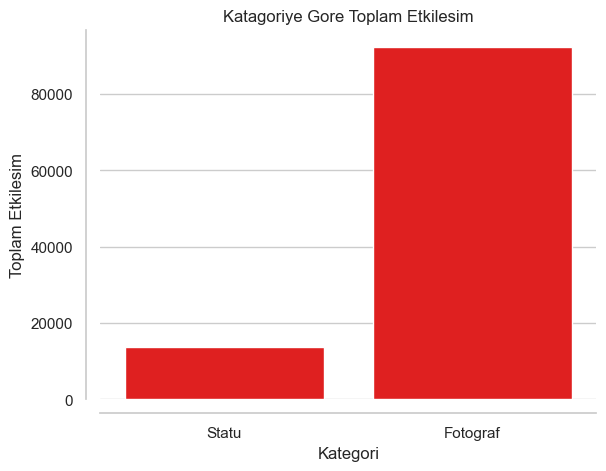

In [21]:
kategori_etk= df1.groupby(['Photo'])['Total Interactions'].sum().reset_index()
bar_color = 'red'
sns.barplot(x='Photo', y='Total Interactions', data=kategori_etk,color=bar_color)
plt.xlabel('Kategori')
plt.ylabel('Toplam Etkilesim')
handles = ["Statu", "Fotograf"]
labels = [0,1]
plt.xticks(labels, handles)
sns.despine(offset = 10)
plt.title("Katagoriye Gore Toplam Etkilesim")

Text(0.5, 1.0, 'Begeni Sayisina Gore Toplam Etkilesim')

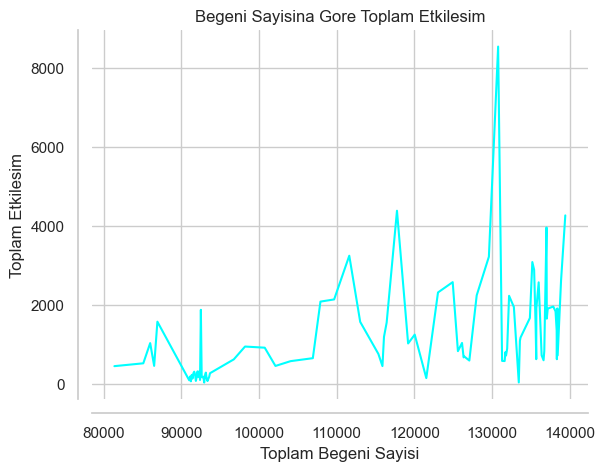

In [22]:
like_etk = df1.groupby(['Page total likes'])['Total Interactions'].sum().reset_index()
bar_color = 'cyan'
sns.lineplot(x='Page total likes', y='Total Interactions', data=like_etk,color=bar_color)
plt.xlabel('Toplam Begeni Sayisi')
plt.ylabel('Toplam Etkilesim')
sns.despine(offset=10)
plt.title("Begeni Sayisina Gore Toplam Etkilesim")

In [23]:
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2

In [24]:
class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated



In [25]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [26]:
numerical_features = ['Category', 'Page total likes', 'Paid','Post Month', 'Post Hour', 'Post Weekday', 'Photo']
data = df1[['Category', 'Page total likes', 'Paid','Post Month', 'Post Hour', 'Post Weekday', 'Photo', 'Total Interactions']]
X = data[['Category', 'Page total likes', 'Paid','Post Month', 'Post Hour', 'Post Weekday', 'Photo']]
y = data['Total Interactions']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [28]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [29]:
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

y_test


69      119
29      174
471     224
344      63
54       83
       ... 
460    1873
152     454
154     387
56      220
392     115
Name: Total Interactions, Length: 100, dtype: int64

In [30]:
predictions

array([163.30222229, 204.95910253, 210.11598467, 188.0050998 ,
       136.05476206, 218.1879261 , 264.84189946, 251.07248144,
       167.51299634, 152.10810888, 198.37220424, 289.33591526,
       304.52748633, 198.61044973, 190.68184942, 182.86631802,
       190.20898261, 161.17501275, 228.80848391, 172.35328624,
       162.41240085,  91.8050295 , 189.37762915, 319.74230049,
       268.48350154, 165.97003026, 192.53656266, 196.16567732,
       261.66119295, 195.43378244, 253.96019528, 288.37446322,
       171.24810523, 214.67441466, 287.68558049, 240.44210877,
       102.83112305, 330.36126739, 200.56619395, 367.51248776,
       135.67967073, 161.63435917, 302.40517917, 176.66509711,
       209.46016259, 167.39402184, 220.03237988,  63.2631785 ,
       236.00316576, 210.86046992,  80.64400306, 238.95418397,
       301.98655401, 106.37314258, 148.5853152 , 171.6265328 ,
        71.8034078 , 286.80969495, 233.80359605,  55.04895942,
       255.13596049, 265.73887718, 132.43052983, 328.63

In [31]:
y_train_pred = regressor.predict(X_train)
sse_train = mean_squared_error(y_train, y_train_pred) * len(y_train)

y_test_pred = regressor.predict(X_test)
sse_test = mean_squared_error(y_test, y_test_pred) * len(y_test)

print("Eğitim Seti için Toplam Kare Hata:", sse_train)
print("Test Seti için Toplam Kare Hata:", sse_test)

Eğitim Seti için Toplam Kare Hata: 56410665.017198086
Test Seti için Toplam Kare Hata: 13183135.49470852


In [32]:
bias = regressor.bias
print("Öğrenilmiş Bias(θ):", bias)

Öğrenilmiş Bias(θ): 207.79102901478797


In [33]:
accu = r2_score(y_test, y_test_pred)
print("Doğruluk:", accu)

Doğruluk: 0.04332821459634527


In [34]:
r_2 = r2_score(y_test, y_test_pred)
print('R^2 %:', r_2 * 100)

R^2 %: 4.332821459634527


In [35]:
weights = regressor.weights
weight_matrix = pd.DataFrame({'Features': X.columns, 'Weights': regressor.weights})
print("\nWeight Matrix (Features):")
print(weight_matrix)

print("Eğitim Seti için Toplam Kare Hata:", sse_train)
print("Test Seti için Toplam Kare Hata:", sse_test)

print("Öğrenilmiş Bias(θ):", bias)

print("Doğruluk:", accu)

print('R^2 %:', r_2 * 100)



Weight Matrix (Features):
           Features    Weights
0          Category  36.466409
1  Page total likes  55.645115
2              Paid  36.222593
3        Post Month -35.224370
4         Post Hour -17.704739
5      Post Weekday -17.032941
6             Photo   5.940650
Eğitim Seti için Toplam Kare Hata: 56410665.017198086
Test Seti için Toplam Kare Hata: 13183135.49470852
Öğrenilmiş Bias(θ): 207.79102901478797
Doğruluk: 0.04332821459634527
R^2 %: 4.332821459634527


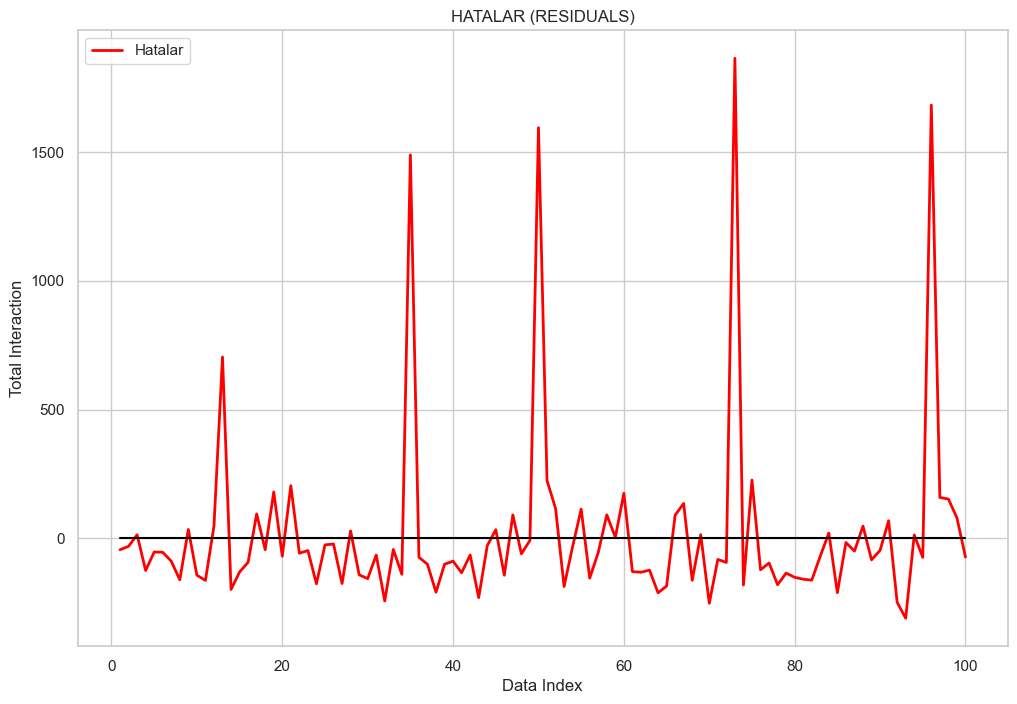

In [36]:
indexler = range(1,101)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_test_pred, label='Hatalar', color='red', linewidth=2)
ax.plot(indexler, np.zeros(100), color='black')

plt.title('HATALAR (RESIDUALS)')
plt.xlabel('Data Index')
plt.ylabel('Total Interaction')
plt.legend(loc='upper left')
plt.show()

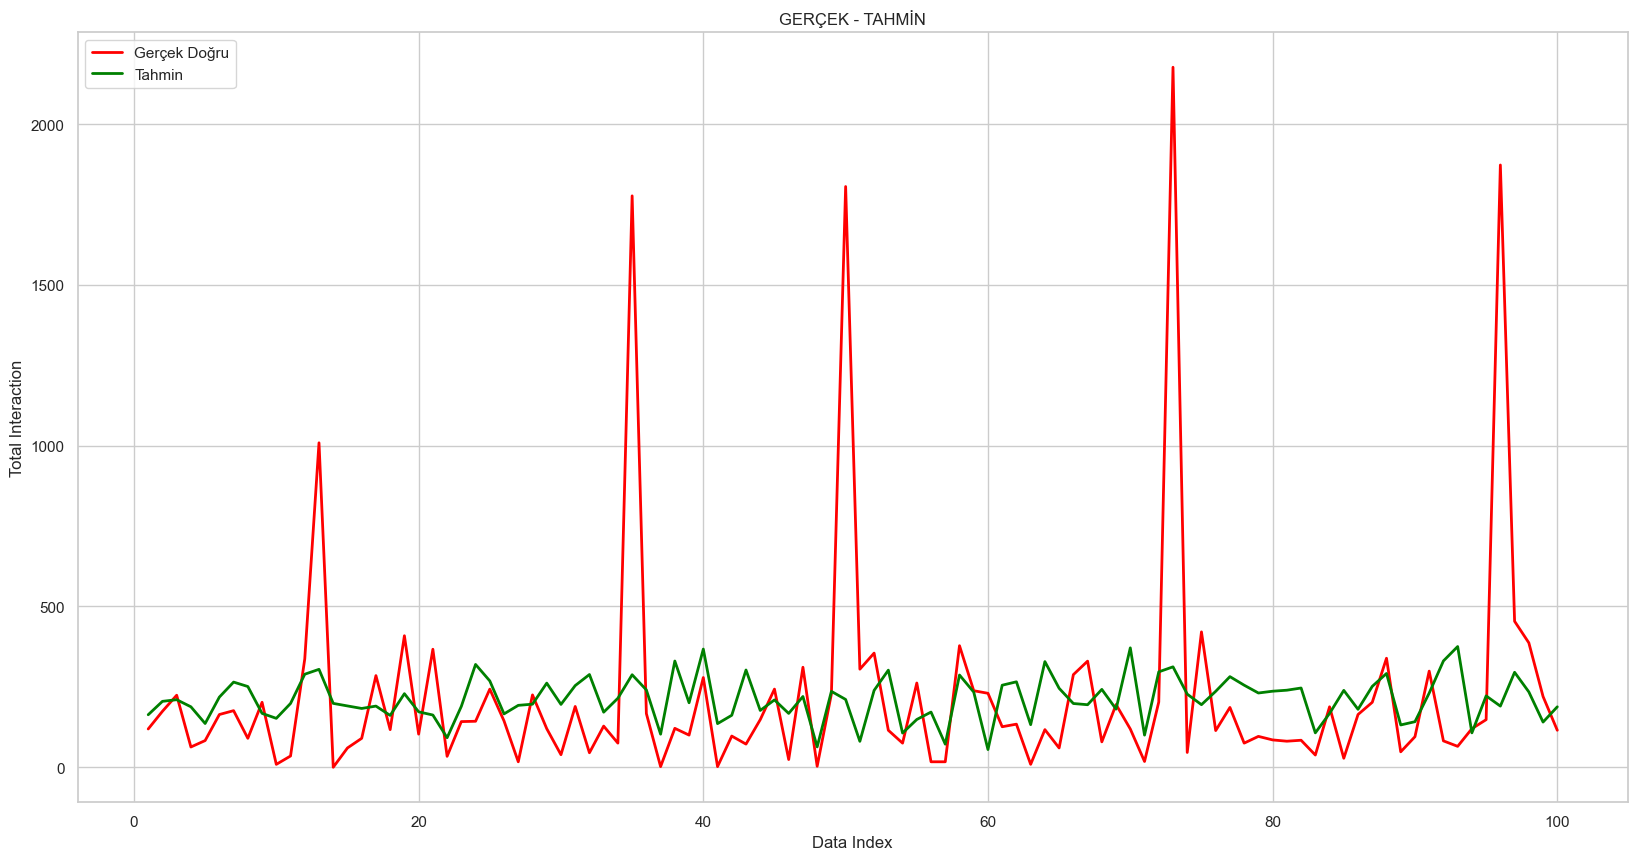

In [37]:
indexler = range(1,101)
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(indexler, y_test, label='Gerçek Doğru', color='red', linewidth=2)
ax.plot(indexler, y_test_pred, label='Tahmin', color='green', linewidth=2)

plt.title('GERÇEK - TAHMİN')
plt.xlabel('Data Index')
plt.ylabel('Total Interaction')
plt.legend(loc='upper left')
plt.show()

In [38]:
numerical_features = ['Page total likes','Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page']
data = df1[['Category', 'Page total likes', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Total Interactions']]
X = data[['Category', 'Page total likes', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page']]
y = data['Total Interactions']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [40]:
regressor = LinearRegression(learning_rate=0.01, n_iters=10000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

y_test


69      119
29      174
471     224
344      63
54       83
       ... 
460    1873
152     454
154     387
56      220
392     115
Name: Total Interactions, Length: 100, dtype: int64

In [41]:
predictions

array([  19.03822434,  471.2862233 ,  150.31319722,  100.82051593,
         12.48344939,  114.46428972,  357.74814472,  106.71899656,
        139.98332207,  -19.2640812 ,   34.24783036,  310.38819666,
        651.08460758, -114.41075153,   95.91183659,  148.32800943,
        147.04180639,  282.59305277,  315.68802443,   92.06313306,
        475.35083614,   20.31819618,  112.80432364,  147.07942725,
        957.76012867,   33.35720855,    5.37116496,  178.61968796,
        109.0619087 ,  102.72218668,  330.18246709,  185.60248469,
        138.56862983,   25.93462896,  804.25836108,  179.97343067,
       -129.92834637,  132.06706564,  227.32350954,  381.25449393,
        -19.67816538,    3.11830322,  189.08402993,  447.00535186,
        133.21201308,  -17.41549237,  222.19866976,  -74.85207523,
       1309.92303773, 1157.73295862,   82.82229547,  215.43038578,
        154.06088793,  -56.65877562,  310.48506573,  227.09201246,
        -14.7174384 ,  299.75294969,  198.24034701,  203.61503

In [42]:
y_train_pred = regressor.predict(X_train)
sse_train = mean_squared_error(y_train, y_train_pred) * len(y_train)

y_test_pred = regressor.predict(X_test)
sse_test = mean_squared_error(y_test, y_test_pred) * len(y_test)

print("Eğitim Seti için Toplam Kare Hata:", sse_train)
print("Test Seti için Toplam Kare Hata:", sse_test)

Eğitim Seti için Toplam Kare Hata: 33678423.01782499
Test Seti için Toplam Kare Hata: 6422557.141883976


In [43]:
bias = regressor.bias
print("Öğrenilmiş Bias(θ):", bias)

Öğrenilmiş Bias(θ): 8.382920589445096


In [44]:
accu = r2_score(y_test, y_test_pred)
print("Doğruluk:", accu)

Doğruluk: 0.5340997976260029


In [45]:
r_2 = r2_score(y_test, y_test_pred)
print('R^2 %:', r_2 * 100)

R^2 %: 53.40997976260029


In [46]:
weights = regressor.weights
weight_matrix = pd.DataFrame({'Features': X.columns, 'Weights': regressor.weights})
print("\nWeight Matrix (Features):")
print(weight_matrix)

print("Eğitim Seti için Toplam Kare Hata:", sse_train)
print("Test Seti için Toplam Kare Hata:", sse_test)

print("Öğrenilmiş Bias(θ):", bias)

print("Doğruluk:", accu)

print('R^2 %:', r_2 * 100)




Weight Matrix (Features):
                                            Features     Weights
0                                           Category  103.549008
1                                   Page total likes   54.050532
2                                               Paid   22.547735
3                          Lifetime Post Total Reach  361.887256
4                    Lifetime Post Total Impressions -336.301054
5                         Lifetime Post Consumptions   31.527535
6  Lifetime Post Impressions by people who have l...  250.500365
Eğitim Seti için Toplam Kare Hata: 33678423.01782499
Test Seti için Toplam Kare Hata: 6422557.141883976
Öğrenilmiş Bias(θ): 8.382920589445096
Doğruluk: 0.5340997976260029
R^2 %: 53.40997976260029


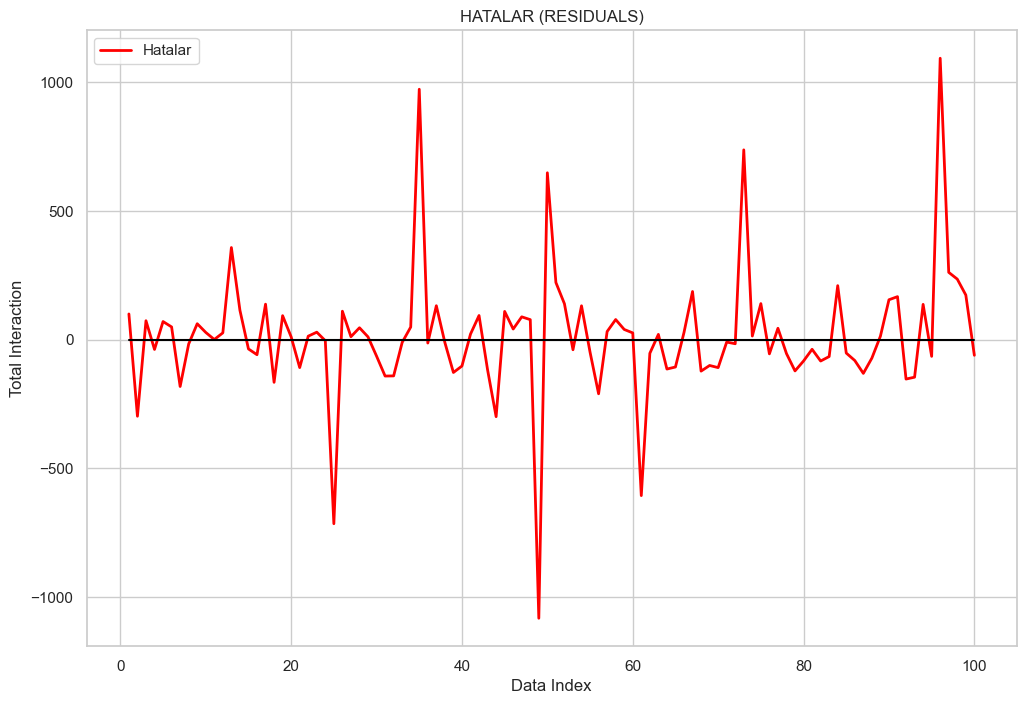

In [47]:
indexler = range(1,101)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_test_pred, label='Hatalar', color='red', linewidth=2)
ax.plot(indexler, np.zeros(100), color='black')

plt.title('HATALAR (RESIDUALS)')
plt.xlabel('Data Index')
plt.ylabel('Total Interaction')
plt.legend(loc='upper left')
plt.show()

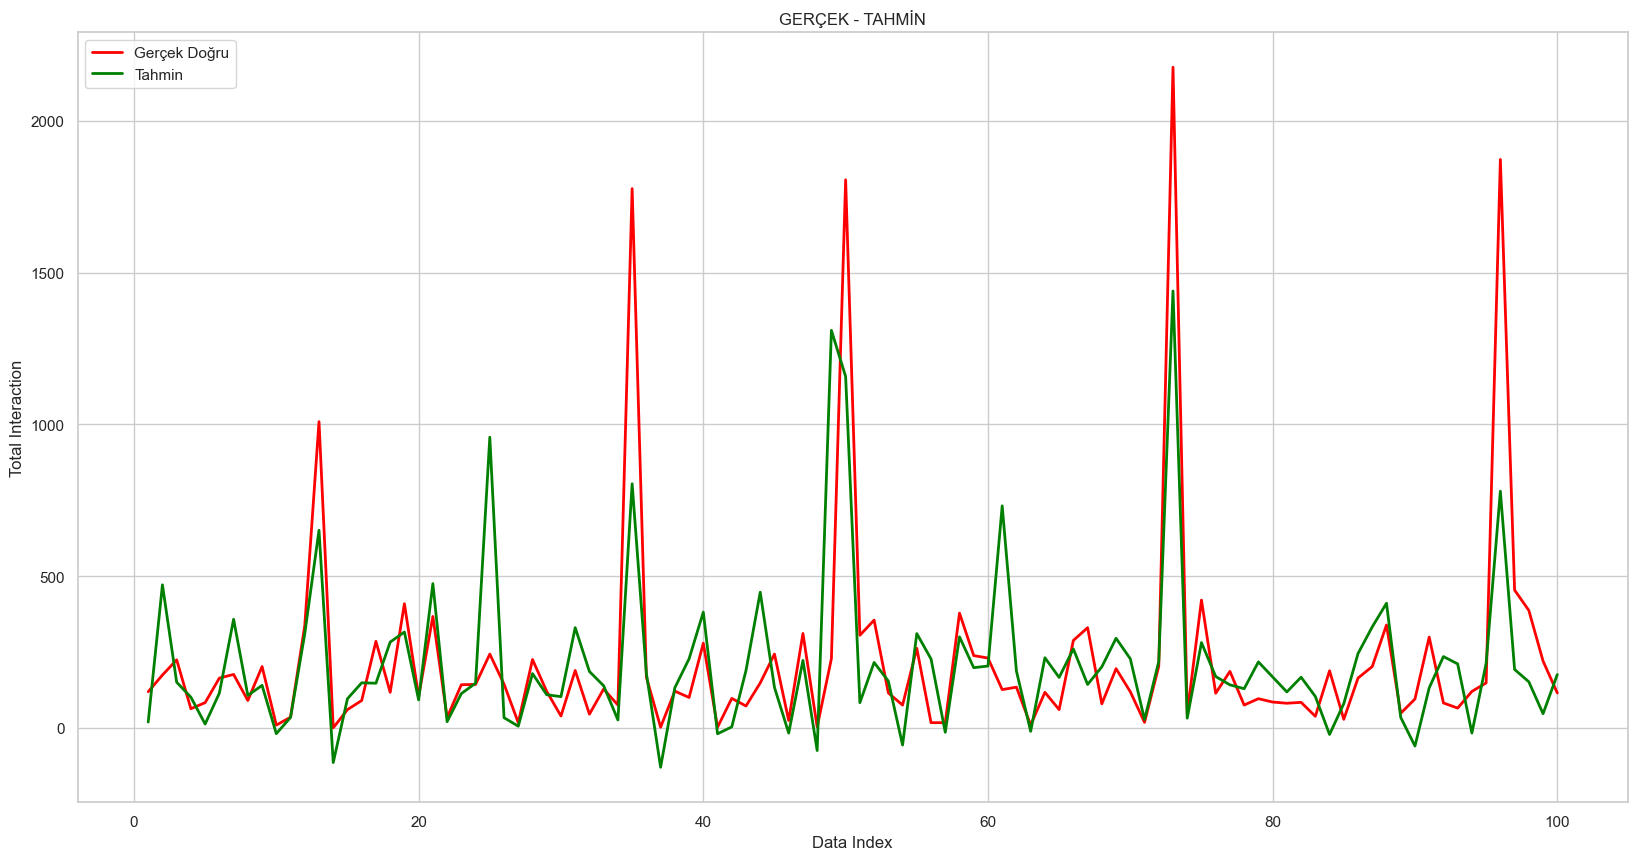

In [48]:
indexler = range(1,101)
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(indexler, y_test, label='Gerçek Doğru', color='red', linewidth=2)
ax.plot(indexler, predictions, label='Tahmin', color='green', linewidth=2)

plt.title('GERÇEK - TAHMİN')
plt.xlabel('Data Index')
plt.ylabel('Total Interaction')
plt.legend(loc='upper left')
plt.show()

In [49]:
numerical_features = ['like','share']
data = df1[['like','share','Total Interactions']]
X = data[['like','share']]
y = data['Total Interactions']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [51]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [52]:
regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

y_test


69      119
29      174
471     224
344      63
54       83
       ... 
460    1873
152     454
154     387
56      220
392     115
Name: Total Interactions, Length: 100, dtype: int64

In [53]:
predictions

array([ 135.1051077 ,  144.9236112 ,  274.63719929,   66.6519674 ,
         80.706044  ,  152.67721632,  192.55969262,   77.12241077,
        226.32375195,    2.61645471,   40.42665808,  302.73797793,
        944.25103313,   -8.47312793,   53.27525674,  112.33960376,
        297.08944633,  112.39783041,  399.29927142,  126.76516391,
        351.05142528,   28.1315975 ,  155.70731148,  137.66531749,
        224.89604435,  147.70605065,   12.87204297,  264.84412185,
        128.40035207,   42.92864122,  186.90378647,   45.30679651,
        144.15521802,   82.74551632, 1688.56025208,  156.97101607,
         -6.80513917,  116.10529149,   75.91693283,  270.08836929,
         43.08526968,  117.34357003,   69.4926335 ,  110.01967512,
        250.93929917,   20.50182024,  374.81492661,   -5.97114479,
        210.96579561, 1678.79260069,  306.2305839 ,  368.47427999,
        134.98127985,   93.49641599,  274.07628668,    4.99460999,
          6.66259875,  410.23960015,  255.48075462,  203.30321

In [54]:
y_train_pred = regressor.predict(X_train)
sse_train = mean_squared_error(y_train, y_train_pred) * len(y_train)

y_test_pred = regressor.predict(X_test)
sse_test = mean_squared_error(y_test, y_test_pred) * len(y_test)

print("Eğitim Seti için Toplam Kare Hata:", sse_train)
print("Test Seti için Toplam Kare Hata:", sse_test)

Eğitim Seti için Toplam Kare Hata: 287601.49500184495
Test Seti için Toplam Kare Hata: 112898.38466142036


In [55]:
bias = regressor.bias
print("Öğrenilmiş Bias(θ):", bias)

Öğrenilmiş Bias(θ): 207.79102901478797


In [56]:
accu = r2_score(y_test, y_test_pred)
print("Doğruluk:", accu)

Doğruluk: 0.9959536674804326


In [57]:
r_2 = r2_score(y_test, y_test_pred)
print('R^2 %:', r_2 * 100)

R^2 %: 99.59536674804326


In [58]:
weights = regressor.weights
weight_matrix = pd.DataFrame({'Features': X.columns, 'Weights': regressor.weights})
print("\nWeight Matrix (Features):")
print(weight_matrix)

print("Eğitim Seti için Toplam Kare Hata:", sse_train)
print("Test Seti için Toplam Kare Hata:", sse_test)

print("Öğrenilmiş Bias(θ):", bias)

print("Doğruluk:", accu)

print('R^2 %:', r_2 * 100)



Weight Matrix (Features):
  Features     Weights
0     like  267.796683
1    share  118.049515
Eğitim Seti için Toplam Kare Hata: 287601.49500184495
Test Seti için Toplam Kare Hata: 112898.38466142036
Öğrenilmiş Bias(θ): 207.79102901478797
Doğruluk: 0.9959536674804326
R^2 %: 99.59536674804326


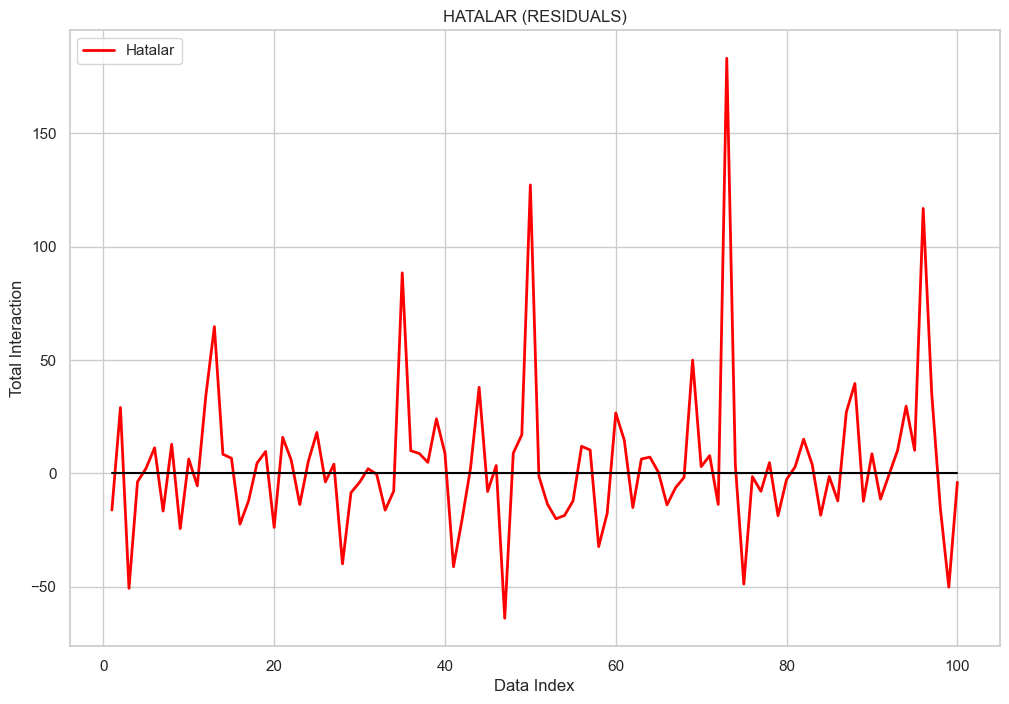

In [59]:
indexler = range(1,101)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_test_pred, label='Hatalar', color='red', linewidth=2)
ax.plot(indexler, np.zeros(100), color='black')

plt.title('HATALAR (RESIDUALS)')
plt.xlabel('Data Index')
plt.ylabel('Total Interaction')
plt.legend(loc='upper left')
plt.show()

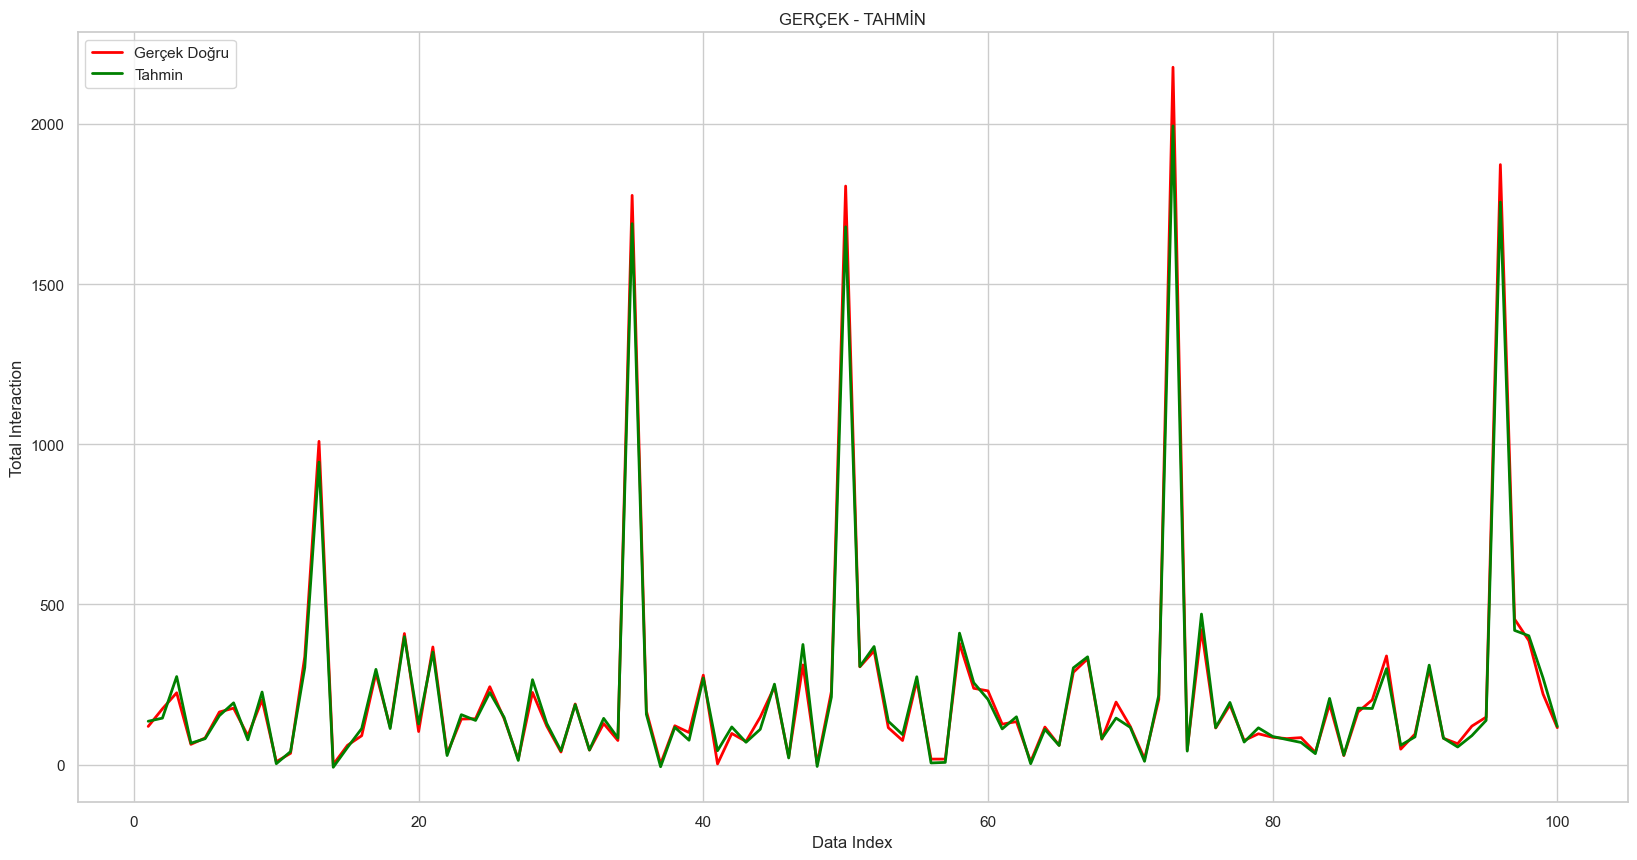

In [60]:
indexler = range(1,101)
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(indexler, y_test, label='Gerçek Doğru', color='red', linewidth=2)
ax.plot(indexler, y_test_pred, label='Tahmin', color='green', linewidth=2)

plt.title('GERÇEK - TAHMİN')
plt.xlabel('Data Index')
plt.ylabel('Total Interaction')
plt.legend(loc='upper left')
plt.show()